# Predict a persons medical health insurance

Given a dataset, with a number of features, can we predict the medical health insurance cost of the specific person?

# Data

The data used in publicly available on kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

## Phase 01

In [11]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Check for any null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Check feature data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# OHE categories
data_ohe = pd.get_dummies(data)
data_ohe.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [10]:
# Create train and test set
X = data_ohe.drop('charges', axis=1)
y = data_ohe['charges']
X.shape, y.shape

((1338, 11), (1338,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    # set random state for reproducible splits
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [21]:
# Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.build()
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 9250.7617 - mae: 9250.7617
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7580.4971 - mae: 7580.4971
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7772.2197 - mae: 7772.2197
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7395.5151 - mae: 7395.5151
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7665.5317 - mae: 7665.5317
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7545.7759 - mae: 7545.7759
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7613.7798 - mae: 7613.7798
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7455.0103 - mae: 7455.0103
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7670.3716 - mae: 7670.3716
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7818.6543 - mae: 7818.6543

34/34 [==============================] - 0s 2ms/step - loss: 7224.0981 - mae: 7224.0981
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 7526.5059 - mae: 7526.5059
Epoch 84/100
34/34 [==============================] - 0s 3ms/step - loss: 7326.6353 - mae: 7326.6353
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 7367.4243 - mae: 7367.4243
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 7224.4941 - mae: 7224.4941
Epoch 87/100
34/34 [==============================] - 0s 4ms/step - loss: 7410.3057 - mae: 7410.3057
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 7326.6206 - mae: 7326.6206
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 7382.6646 - mae: 7382.6646
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 7184.0322 - mae: 7184.0322
Epoch 91/100
34/34 [==============================] - 0s 4ms/step - loss: 7367.8135 - mae: 7367.8135
Epo

In [23]:
# Evaluate model
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8678.6982 - mae: 8678.6982


[8678.6982421875, 8678.6982421875]

Model is really bad -> Improve

In [28]:
# Try with an extra hidden layer & another optimizer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

model_2.build()
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               1200      
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13279.3984 - mae: 13279.3984
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13094.4199 - mae: 13094.4199
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12724.1572 - mae: 12724.1572
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12014.3779 - mae: 12014.3779
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10845.2529 - mae: 10845.2529
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9389.8164 - mae: 9389.8164
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8095.3755 - mae: 8095.3755
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7518.6543 - mae: 7518.6543
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.3857 - mae: 7429.3857
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7405.7861 - mae:

34/34 [==============================] - 0s 3ms/step - loss: 5763.4619 - mae: 5763.4619
Epoch 83/100
34/34 [==============================] - 0s 4ms/step - loss: 5727.7012 - mae: 5727.7012
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 5694.3682 - mae: 5694.3682
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 5661.7529 - mae: 5661.7529
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 5619.6113 - mae: 5619.6113
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 5583.0518 - mae: 5583.0518
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 5553.6147 - mae: 5553.6147
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 5517.1802 - mae: 5517.1802
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 5462.5293 - mae: 5462.5293
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 5414.1265 - mae: 5414.1265
Epo

In [30]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4773.7886 - mae: 4773.7886


[4773.78857421875, 4773.78857421875]

In [31]:
# Try with more epochs
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

model_3.build()
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               1200      
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 3490.0977 - mae: 3490.0977
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 3476.5654 - mae: 3476.5654
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 3474.0710 - mae: 3474.0710
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 3480.8281 - mae: 3480.8281
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 3477.6362 - mae: 3477.6362
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 3476.8765 - mae: 3476.8765
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 3487.6863 - mae: 3487.6863
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 3481.7942 - mae: 3481.7942
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 3482.1123 - mae: 3482.1123
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 3473.3796 - mae: 3473.3796

34/34 [==============================] - 0s 3ms/step - loss: 3491.9285 - mae: 3491.9285
Epoch 83/200
34/34 [==============================] - 0s 2ms/step - loss: 3487.1338 - mae: 3487.1338
Epoch 84/200
34/34 [==============================] - 0s 2ms/step - loss: 3476.3518 - mae: 3476.3518
Epoch 85/200
34/34 [==============================] - 0s 2ms/step - loss: 3476.2075 - mae: 3476.2075
Epoch 86/200
34/34 [==============================] - 0s 2ms/step - loss: 3478.6140 - mae: 3478.6140
Epoch 87/200
34/34 [==============================] - 0s 2ms/step - loss: 3475.7183 - mae: 3475.7183
Epoch 88/200
34/34 [==============================] - 0s 2ms/step - loss: 3477.4353 - mae: 3477.4353
Epoch 89/200
34/34 [==============================] - 0s 2ms/step - loss: 3475.9319 - mae: 3475.9319
Epoch 90/200
34/34 [==============================] - 0s 3ms/step - loss: 3477.7969 - mae: 3477.7969
Epoch 91/200
34/34 [==============================] - 0s 3ms/step - loss: 3474.5520 - mae: 3474.5520
Epo

34/34 [==============================] - 0s 2ms/step - loss: 3483.4070 - mae: 3483.4070
Epoch 163/200
34/34 [==============================] - 0s 2ms/step - loss: 3487.7246 - mae: 3487.7246
Epoch 164/200
34/34 [==============================] - 0s 2ms/step - loss: 3498.6621 - mae: 3498.6621
Epoch 165/200
34/34 [==============================] - 0s 2ms/step - loss: 3520.5588 - mae: 3520.5588
Epoch 166/200
34/34 [==============================] - 0s 2ms/step - loss: 3489.1572 - mae: 3489.1572
Epoch 167/200
34/34 [==============================] - 0s 2ms/step - loss: 3475.1699 - mae: 3475.1699
Epoch 168/200
34/34 [==============================] - 0s 2ms/step - loss: 3475.7556 - mae: 3475.7556
Epoch 169/200
34/34 [==============================] - 0s 2ms/step - loss: 3483.1003 - mae: 3483.1003
Epoch 170/200
34/34 [==============================] - 0s 3ms/step - loss: 3493.0745 - mae: 3493.0745
Epoch 171/200
34/34 [==============================] - 0s 3ms/step - loss: 3485.5520 - mae: 3485

In [38]:
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.1562 - mae: 3160.1562


[3160.15625, 3160.15625]

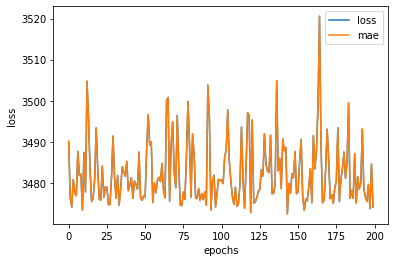

In [39]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs');

## Phase 02

Model performance is quite bad. However, we haven't done any feature scaling.

Feature scaling can be done in two ways:
* Normalization - bringing all features down to a common scale of 0-1
* Standardization - converting all features to unit variance and 0 mean

**Neural networks tend to prefer normalization** since they prefer values be between 0 and 1

In [41]:
data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
# Add preprocessing step
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    # Scale these (numerical) features to 0-1
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    # OHE these (categorical) columns
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

In [48]:
X = data.drop('charges', axis=1)
y = data['charges']
X.shape, y.shape

((1338, 6), (1338,))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [50]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


In [51]:
# Fit column transformer on only train data 
# doing so on test data would result in data leakage
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])